In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Downloading dataset and separating them in test and train dataset

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Exploring the dataset

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

Preparing Validation dataset

In [ ]:
valid_images = test_images[:2000]
valid_images.shape

(2000, 28, 28)

In [ ]:
valid_labels = test_labels[:2000]
len(valid_labels)

2000

Data Preprocessing

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

vallid_images = valid_images/255.0

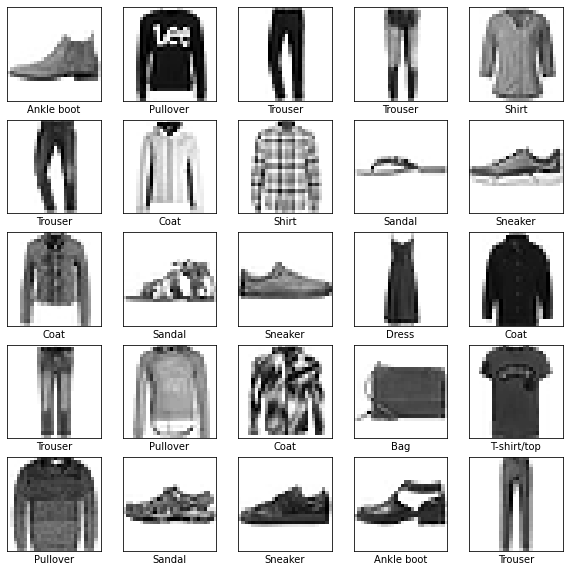

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(valid_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[valid_labels[i]])
plt.show()

Build the model

In [5]:
model = tf.keras.Sequential()
# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, strides = (2,2), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
# Take a look at the model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 14, 14, 32)        18464     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 4, 4, 16)          4624      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 2, 2, 16)        

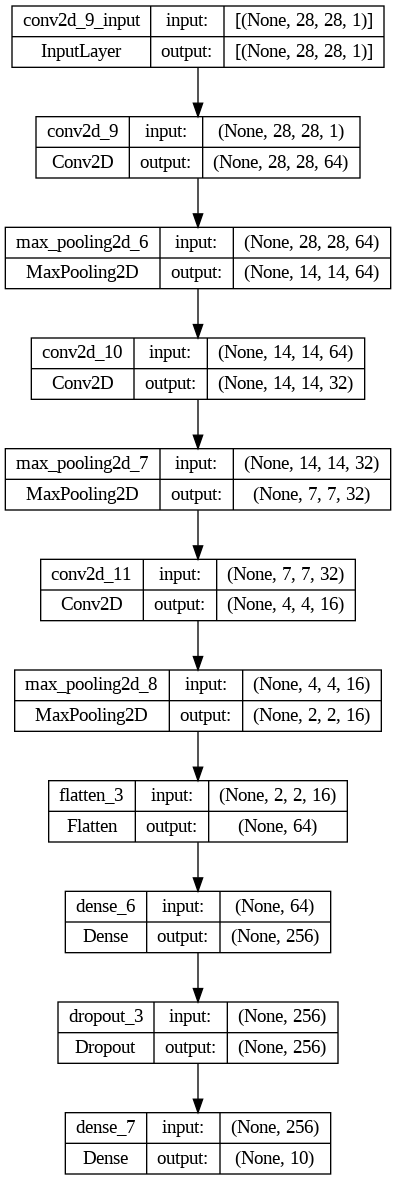

In [6]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
# model = tf.keras.applications.vgg16.VGG16(
#     include_top=True,
#     weights=None,
#     input_tensor=None,
#     input_shape=(224,224,3),
#     pooling=None,
#     classes=10,
#     classifier_activation='softmax'
# )
# model.summary()
model = tf.keras.applications.resnet.ResNet101(
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax'
)


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, batch_size=64, epochs=10, validation_data=(valid_images, valid_labels))

Epoch 1/10


/usr/local/lib/python3.9/dist-packages/keras/backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


938/938 [==============================] - 118s 124ms/step - loss: 0.5543 - accuracy: 0.7998 - val_loss: 39.0337 - val_accuracy: 0.8745
Epoch 2/10
938/938 [==============================] - 117s 125ms/step - loss: 0.3736 - accuracy: 0.8672 - val_loss: 31.3686 - val_accuracy: 0.8925
Epoch 3/10
938/938 [==============================] - 112s 120ms/step - loss: 0.3175 - accuracy: 0.8852 - val_loss: 29.9081 - val_accuracy: 0.9010
Epoch 4/10
938/938 [==============================] - 112s 119ms/step - loss: 0.2870 - accuracy: 0.8967 - val_loss: 26.1948 - val_accuracy: 0.8895
Epoch 5/10
938/938 [==============================] - 112s 119ms/step - loss: 0.2651 - accuracy: 0.9052 - val_loss: 27.1390 - val_accuracy: 0.8905
Epoch 6/10
938/938 [==============================] - 111s 118ms/step - loss: 0.2473 - accuracy: 0.9099 - val_loss: 30.0122 - val_accuracy: 0.8920
Epoch 7/10
938/938 [==============================] - 111s 119ms/step - loss: 0.2301 - accuracy: 0.9154 - val_loss: 27.0970 - val

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 5s - loss: 0.2359 - accuracy: 0.9194 - 5s/epoch - 15ms/step

Test accuracy: 0.9193999767303467
